In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from models.actions.JumpActionSets import JumpActionSets
from models.actions.ActionNodeList import ActionNodeList

In [2]:
import numpy as np
from utils.PlotTools import PlotTools
jumpActionSets = JumpActionSets()

In [3]:
# ax = ActionSeries.preparePlot(figsize=7, gridStep=1)

# wallJumps = jumpActionSets.getWallJumpsBackSprint(0, 6, 1, 50)
# wallJumpList = ActionNodeList.fromActionSets(wallJumps)
# wallJumpList.plotNodes(ax=ax[0])

# wallJumps = jumpActionSets.getWallJumpsForwardIdle(50, 40)
# wallJumpList = ActionNodeList.fromActionSets(wallJumps)
# wallJumpList.plotNodes(ax=ax[0])

ActionNodeList: 176
ActionNodeList: 176


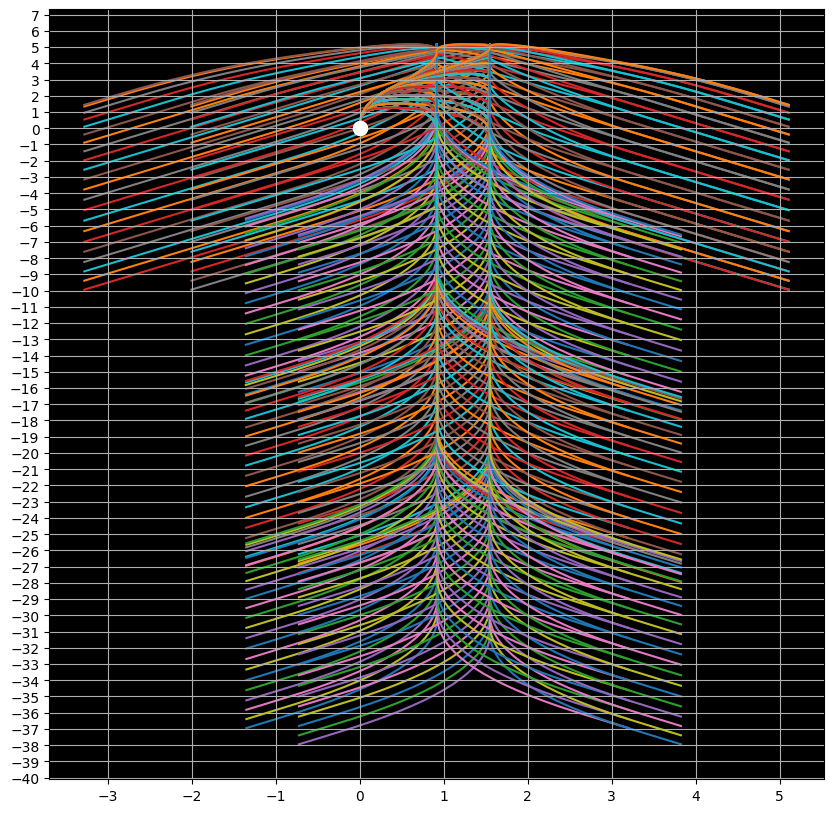

In [4]:

plot = PlotTools.create(figsize=10, gridStep=1)

def plotJumpSet(jumpSet, **kwargs):
    jumpNodes = ActionNodeList.fromActionSets(jumpSet, addNormal=True, addInverted=False)
    plot.plotNodes(jumpNodes.nodes, **kwargs)
    plot.axis[0].plot([0], [0], color='white', marker='o', markersize=10)
    print(jumpNodes)
    pass


# plotJumpSet(jumpActionSets.getShortGroundIdleIdleForwardJumps([
#     range(0, 1, 5),
#     range(0, 20, 5),
#     range(0, 70, 20),
#     [10]
# ]))
# plotJumpSet(jumpActionSets.getShortGroundIdleIdleBackwardJumps([
#     range(0, 1, 5),
#     range(0, 20, 5),
#     range(0, 70, 20),
#     [10]
# ]))
plotJumpSet(jumpActionSets.getShortGroundIdleIdleBackwardJumps2([
    [0],
    range(0, 100, 30),
    [0]
]))
plotJumpSet(jumpActionSets.getShortGroundIdleIdleForwardJumps2([
    [0],
    range(0, 100, 30),
    [0]
]))
# plotJumpSet(jumpActionSets.getShortGroundIdleIdleForwardJumps([
#     range(0, 6, 5),
#     range(0, 90, 20),
#     [1]
# ]))
# plotJumpSet(jumpActionSets.getShortGroundIdleIdleJumps(20, 1, 100))

# plotJumpSet(jumpActionSets.getGroundJumps().getActionSeries())



In [5]:
groundJumps = jumpActionSets.getGroundJumps()
wallJumps = jumpActionSets.getWallJumps()
groundJumps

ActionSet: GroundJumps: 2794

In [6]:
from models.actions.JumpActionNodeMap import JumpActionNodeMap
from models.player.PlayerConstants import PlayerConstants
from utils.Vec import Vec


jumpNodes = ActionNodeList.fromActionSets(groundJumps.getActionSeries(), addNormal=True, addInverted=False)
jumpMap = JumpActionNodeMap(None, jumpNodes, interpolateSteps=0, forceCreate=True)

# plot = PlotTools.create()
# plot.plotNodes(jumpNodes.nodes)

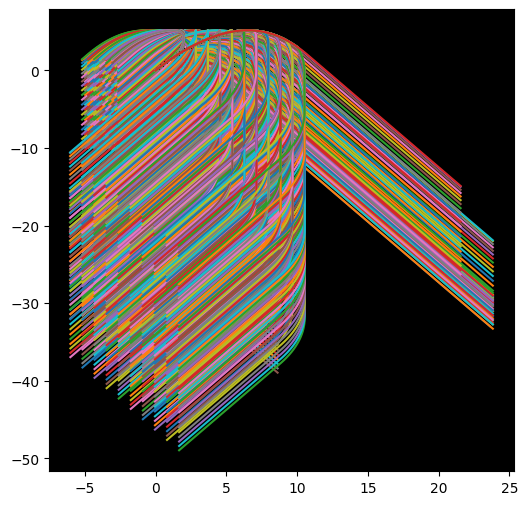

In [7]:

plot = PlotTools.create()
plot.plotNodes(jumpNodes.nodes)

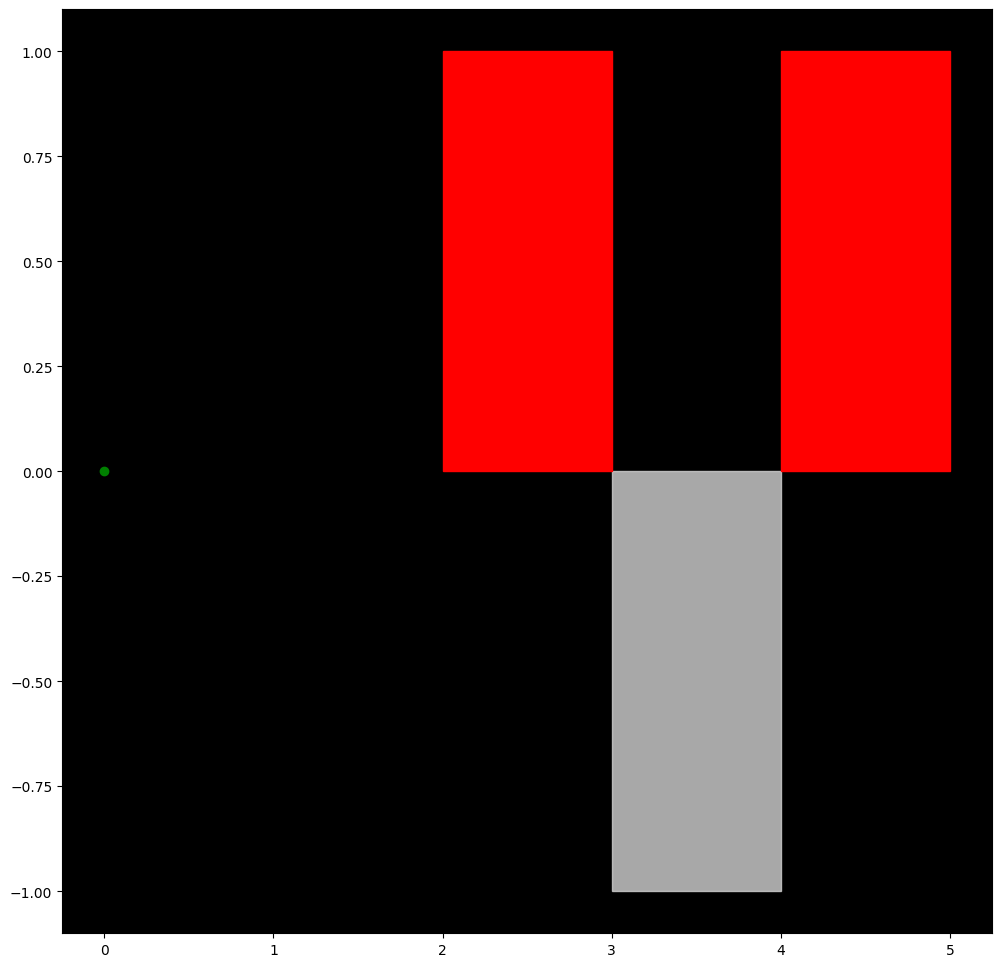

In [8]:
from models.filter.ActionNodeFilter import ActionNodeFilter
from models.filter.ActionNodeToPathSegmentConverter import ActionNodeToPathSegmentConverter
from models.filter.BlockCollisionFilter import BlockCollisionFilter
from models.filter.BlockContactFilter import BlockContactFilter
from models.level.Block import Block
from models.level.BlockMap import BlockMap
from models.level.BlockType import BlockType
from utils.Rect import Rect
from utils.Vec import Vec

offset = Vec([1, 0])

rect = Rect([2, -1, 3, 0]).offset(offset)
obstacleRects = [
    Rect([1, 0, 2, 1]).offset(offset),
    Rect([3, 0, 4, 1]).offset(offset)
]

blockMap = BlockMap([
    Block(0, BlockType.Block, Vec([rect.x1, rect.y1]), Vec([rect.width, rect.height])),
    *[Block(1, BlockType.Death, Vec([r.x1, r.y1]), Vec([r.width, r.height])) for r in obstacleRects]
])


nodeFilter = ActionNodeFilter.combine([
    BlockContactFilter(jumpMap, [rect], invert=False, padding=0),
    BlockContactFilter(jumpMap, obstacleRects, invert=True, padding=0),
    ActionNodeToPathSegmentConverter(Vec.empty()),
    BlockCollisionFilter(blockMap)
])
nodes = list(nodeFilter(jumpNodes.nodes))

plot = PlotTools.create(figsize=12)

plot.plotBlocks(blockMap.blocks)
plot.plotPathSegments(nodes)
plot.axis[0].plot(0, 0, 'o', color='green')

# for segment in nodes:
#     for pathNode in segment.pathNodes:
#         # print(segment.lastNode.velocity)
#         plot.plotRectangle(PlayerConstants.playerRect.offset(pathNode.position), edgeColor='red', alpha=0.3)

In [9]:
groundJumpMap = JumpActionNodeMap('GroundJumps', jumpNodes, forceCreate=False)
groundJumpMap

TypeError: JumpActionNodeMap.__init__() missing 1 required positional argument: 'interpolateSteps'

In [ ]:
jumpMap = groundJumpMap.filterNodes(ActionNodeFilter.combine([
    groundJumpMap.createIntersectFilter([(-3, -1, 3, -1)], invert=False),
    groundJumpMap.createIntersectFilter([(1, 5, 2, 6)], invert=True),
    ActionNodeFilter.samePositions(xMultiplier=1, yMultiplier=1)
]))

# print(jumpMap.rtree)
# print(len(set(groundJumpMap.rtree.intersection((-100, 0, 100, 100)))))
# jumpMap = jumpMap.filterNodes(jumpMap.createIntersectFilter([(1, 5, 2, 6)], invert=True))
# jumpMap = jumpMap.filterNodes(nodeFilter=ActionNodeFilter.samePositions(xMultiplier=2, yMultiplier=1))
jumpMap.nodeList.plotNodes()


ActionNodeList: 7


AttributeError: type object 'ActionSeries' has no attribute 'preparePlot'

4 5
ActionNodeList: 5


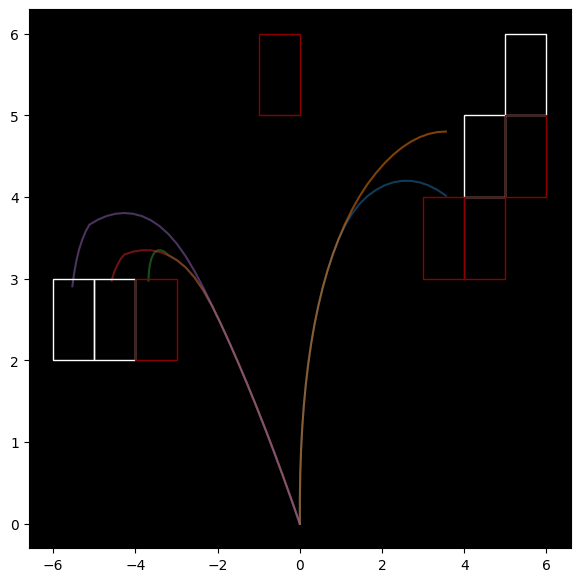

In [ ]:



blocks = [
    (4, 4),
    (5, 5),
    (-5, 2),
    (-6, 2),
]

obstacles = [
    (5, 4),
    (4, 3),
    (3, 3),
    (-1, 5),
    (-4, 2),
]

blockRects = [(x, y, x + 1, y + 1) for (x, y) in blocks]
tolerance = 0
trapRects = [
    (x + tolerance, y + tolerance, x + 1 - 2 * tolerance, y + 1 - 2 * tolerance)
    for (x, y) in obstacles
]

# blockRects = [(x, y, x + 1, y + 1) for x in range(-11, 11) for y in range(-3, -2)]
# trapRects = [(x, y, x + 1, y + 1) for x in range(-10, 11) for y in range(4, 6)]

blockRects = blockRects * 1
trapRects = trapRects * 1

print(len(blockRects), len(trapRects))

nodeMap = groundJumpMap.filterNodes(ActionNodeFilter.combine([
    groundJumpMap.createIntersectFilter(blockRects, invert=False),
    groundJumpMap.createIntersectFilter(trapRects, invert=True, padding=0.1),
    ActionNodeFilter.samePositions(xMultiplier=1, yMultiplier=1)
]))

ax = ActionSeries.preparePlot(figsize=7)
nodeMap.nodeList.plotNodes(alpha=0.5, haloAlpha=None, ax=ax[0])
for r in blockRects:
    plot_box(ax=ax[0], x=r[0], y=r[1], width=r[2] - r[0], height=r[3] - r[1], edgeColor="white", alpha=1, zorder=1)
for r in trapRects:
    plot_box(ax=ax[0], x=r[0], y=r[1], width=r[2] - r[0], height=r[3] - r[1],edgeColor="darkred", alpha=1, zorder=1)